<a href="https://colab.research.google.com/github/reemda/Technology_Fundamentals_Course/blob/main/SOLUTION_Tech_Fun_C3_L1_Practice_with_Feature_Engineering_and_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technology Fundamentals Course 3, Lab 1: Practice with Feature Engineering and Pipelines

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

**Teaching Assitants**: Varsha Bang, Harsha Vardhan

**Contact**: vbang@uw.edu, harshav@uw.edu
<br>

---

<br>

In this lab we will continue to practice creation of pipelines and feature engineering. We will use the wine dataset.

<br>

---




In [ ]:
# # extra code
# num_cols = list(df.columns.values)
# num_cols.remove('type')
# cat_cols = 'type'

# enc = OneHotEncoder()

# enc.fit(df[cat_cols].values.reshape(-1,1))

# X_cat = enc.transform(df[cat_cols].values.reshape(-1,1)).toarray()
# X_num = df[num_cols].values

# L1 Q1: 

Fill in any missing data in your dataset using imputation and use this new data for Q2-Q3

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Code Cell for L1 Q1
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "ds_for_engineers/main/data/wine_quality/winequalityN.csv")
print(df.shape)
df.isnull().sum()

(6497, 13)


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
imp = SimpleImputer(strategy='mean')
X_num = imp.fit_transform(df.select_dtypes(include='number'))
df[df.select_dtypes(include='number').columns] = X_num

imp = SimpleImputer(strategy='most_frequent')
X_num = imp.fit_transform(df.select_dtypes(exclude='number'))
df[df.select_dtypes(exclude='number').columns] = X_num

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# L1 Q2:

Use 3 different scaling methods on the input data and evaluate how they affect VIF, kurtosis, and skew



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

I'll start with the original data...

In [ ]:
desc = pd.DataFrame()
X_num = df.select_dtypes(include='number')
desc["VIF Factor"] = [variance_inflation_factor(X_num.values, i) for i in 
                     range(X_num.shape[1])]
desc["features"] = X_num.columns
desc = desc.set_index('features')

desc["Skew"] = X_num.skew()
desc["Kurtosis"] = X_num.kurt()
desc = desc.sort_values("VIF Factor")
desc_org = desc
desc_org

,VIF Factor,Skew,Kurtosis
features,,,
residual sugar,3.625543,1.435221,4.360399
chlorides,5.578253,5.400680,50.911457
free sulfur dioxide,8.536147,1.220066,7.906238
citric acid,9.344847,0.473142,2.404077
volatile acidity,9.508344,1.496433,2.834263
total sulfur dioxide,14.879019,-0.001177,-0.371664
sulphates,18.715513,1.799021,8.667071
fixed acidity,58.896033,1.724131,5.070143
quality,63.918782,0.189623,0.232322


moving on to sqrt transformed

we can view a histogram of the transformed data...

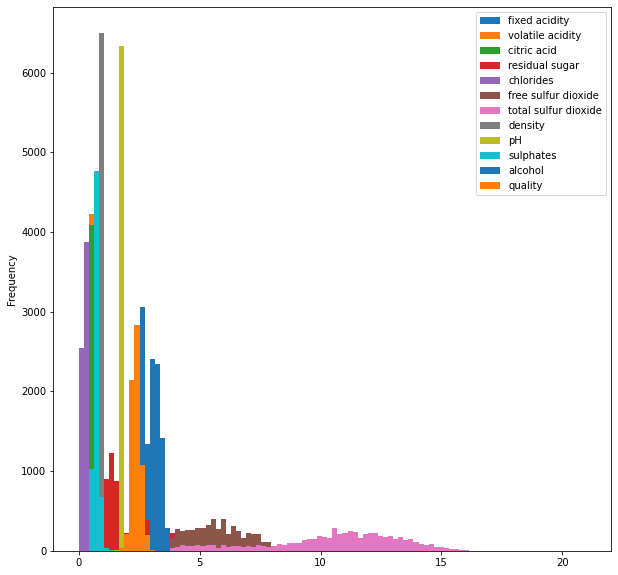

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
X_num.apply(lambda x: np.sqrt(x)).plot(kind='hist', bins=100, ax=ax)

gonna wrap the desc making stuff into a function now...

In [ ]:
def make_desc(X_num):
  """
  returns the VIF, kurtosis, and skew for each of the features in the input data
  frame.
  """
  desc = pd.DataFrame()
  desc["VIF Factor"] = [variance_inflation_factor(X_num.values, i) for i in 
                      range(X_num.shape[1])]
  desc["features"] = X_num.columns
  desc = desc.set_index('features')
  desc["Skew"] = X_num.skew()
  desc["Kurtosis"] = X_num.kurt()
  desc = desc.sort_values("VIF Factor")
  
  return desc

and then return the desc of the sqrt transformed data

In [ ]:
X_sqrt = X_num.apply(lambda x: np.sqrt(x))

desc_sqrt = make_desc(X_sqrt)
desc_sqrt

,VIF Factor,Skew,Kurtosis
features,,,
residual sugar,9.438840,0.715544,-0.526171
citric acid,23.569923,-1.217302,3.018777
free sulfur dioxide,28.512706,0.031387,0.012355
chlorides,31.633497,2.419756,12.104941
volatile acidity,38.824850,0.888822,0.636383
total sulfur dioxide,44.496937,-0.652641,-0.205032
sulphates,78.071479,0.970584,2.755412
quality,249.722277,-0.076065,0.413146
fixed acidity,261.949125,1.287217,3.132631


we'll have to remove values not greater than 0 for the log and boxcox transformed data

In [ ]:
(X_num > 0).all(axis=1).value_counts()

True     6347
False     150
dtype: int64

In [ ]:
X_log = X_num.loc[(X_num > 0).all(axis=1)].apply(lambda x: np.log(x))

desc_log = make_desc(X_log)
desc_log

,VIF Factor,Skew,Kurtosis
features,,,
citric acid,7.489169,-2.449691,8.846770
sulphates,10.935587,0.421307,0.732771
residual sugar,13.622502,0.210615,-1.257796
volatile acidity,15.158900,0.317254,-0.134131
density,40.689651,0.484344,6.053606
free sulfur dioxide,62.537159,-0.853153,0.509583
chlorides,102.532671,0.916347,2.503444
total sulfur dioxide,138.959262,-1.450177,1.712245
quality,188.719973,-0.353839,0.911139


Lol at this VIF for acidity/alcohol...

In [ ]:
X_box = X_num.loc[(X_num > 0).all(axis=1)].apply(lambda x: stats.boxcox(x)[0])

desc_box = make_desc(X_box)
desc_box

,VIF Factor,Skew,Kurtosis
features,,,
sulphates,8.715385,-0.007824,0.167064
volatile acidity,10.573488,0.007637,-0.149624
residual sugar,12.448367,0.061606,-1.283508
total sulfur dioxide,17.400219,-0.165987,-0.370448
free sulfur dioxide,20.915879,-0.036914,-0.029837
density,22.354924,-0.019478,0.241219
citric acid,24.809413,0.122929,1.678155
chlorides,34.854518,-0.064650,1.182001
quality,68.622581,0.011892,0.305481


In [ ]:
desc = pd.concat([desc_org, desc_sqrt, desc_log, desc_box],
                 keys=['original', 'square_root', 'log', 'box_cox'])
desc

VIF Factor      Skew   Kurtosis
            features                                               
original    residual sugar            3.625543  1.435221   4.360399
            chlorides                 5.578253  5.400680  50.911457
            free sulfur dioxide       8.536147  1.220066   7.906238
            citric acid               9.344847  0.473142   2.404077
            volatile acidity          9.508344  1.496433   2.834263
            total sulfur dioxide     14.879019 -0.001177  -0.371664
            sulphates                18.715513  1.799021   8.667071
            fixed acidity            58.896033  1.724131   5.070143
            quality                  63.918782  0.189623   0.232322
            alcohol                 129.995434  0.565718  -0.531687
            pH                      588.916620  0.387234   0.374743
            density                 942.748200  0.503602   6.606067
square_root residual sugar            9.438840  0.715544  -0.526171
            citric acid              23.569923 -1.217302   3.018777
            free sulfur dioxide      28.512706  0.031387   0.012355
            chlorides                31.633497  2.419756  12.104941
            volatile acidity         38.824850  0.888822   0.636383
            total sulfur dioxide     44.496937 -0.652641  -0.205032
            sulphates                78.071479  0.970584   2.755412
            quality                 249.722277 -0.076065   0.413146
            fixed acidity           261.949125  1.287217   3.132631
            alcohol                 551.533219  0.472722  -0.668288
            pH                     2419.357313  0.306340   0.257039
            density                3910.157379  0.485225   6.303355
log         citric acid               7.489169 -2.449691   8.846770
            sulphates                10.935587  0.421307   0.732771
            residual sugar           13.622502  0.210615  -1.257796
            volatile acidity         15.158900  0.317254  -0.134131
            density                  40.689651  0.484344   6.053606
            free sulfur dioxide      62.537159 -0.853153   0.509583
            chlorides               102.532671  0.916347   2.503444
            total sulfur dioxide    138.959262 -1.450177   1.712245
            quality                 188.719973 -0.353839   0.911139
            fixed acidity           339.812097  0.910455   1.908972
            pH                      667.167656  0.198299   0.122920
            alcohol                1665.804884  0.373617  -0.792214
box_cox     sulphates                 8.715385 -0.007824   0.167064
            volatile acidity         10.573488  0.007637  -0.149624
            residual sugar           12.448367  0.061606  -1.283508
            total sulfur dioxide     17.400219 -0.165987  -0.370448
            free sulfur dioxide      20.915879 -0.036914  -0.029837
            density                  22.354924 -0.019478   0.241219
            citric acid              24.809413  0.122929   1.678155
            chlorides                34.854518 -0.064650   1.182001
            quality                  68.622581  0.011892   0.305481
            pH                     5921.294364 -0.000652   0.029647
            fixed acidity         10667.877594 -0.064151   1.174330
            alcohol               26515.335732  0.066160  -0.978754

In [ ]:
def my_fig(metric=desc.columns):
  fig, ax = plt.subplots(1, 1, figsize=(10,10))
  pd.DataFrame(desc[metric]).unstack()[metric].T.plot(kind='barh', ax=ax)

In [ ]:
from ipywidgets import interact

In [ ]:
interact(my_fig)

interactive(children=(Dropdown(description='metric', options=('VIF Factor', 'Skew', 'Kurtosis'), value='VIF Fa…

<function __main__.my_fig>

# L1 Q3:

Create a Pipeline using one of the scaling methods in sklearn and linear or logistic regression. Make the **_dependent variable_** the wine quality



## Option 1

I'm going to do this two different ways..

In [ ]:
# Code Cell for L1 Q3
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

First with all the tools we've seen up until now...

In [ ]:
# create X and y
X = df.copy()
y = X.pop('quality')

### SEE MODEL SELECTION NOTEBOOK C2 S4 1.1.1 FOR TRAIN_TEST_SPLIT
# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

### SEE MODEL SELECTION NOTEBOOK C2 S4 1.2 FOR MAKE_PIPELINE
### SEE FEATURE ENGINEERING NOTEBOOK C3 S1 FOR SIMPLEIMPUTER, ONEHOTENCODER,
### AND STANDARDSCALER

# the numerical values pipe
num_proc = make_pipeline(SimpleImputer(strategy='median'), # impute with median
                         StandardScaler()) # scale and center

# the categorical values pipe
cat_proc = make_pipeline(
    SimpleImputer(strategy='constant', 
                  fill_value='missing'), # impute with placeholder
    OneHotEncoder(handle_unknown='ignore')) # one hot encode

Now we need to send the categorical columns to cat_proc and the numerical columns to num_proc

In [ ]:
def process_data(data, fit=True):
  data_num = data.select_dtypes(include='number')
  data_cat = data.select_dtypes(exclude='number')

  if fit:
    data_num_std = num_proc.fit_transform(data_num)
    data_cat_std = cat_proc.fit_transform(data_cat).toarray()
  else:
    data_num_std = num_proc.transform(data_num)
    data_cat_std = cat_proc.transform(data_cat).toarray()

  data_all = np.concatenate((data_num_std,
                                data_cat_std), axis=1)
  return data_all

Then we can process our data for the train and test sets

In [ ]:
X_train_proc = process_data(X_train, fit=True)
X_test_proc = process_data(X_test, fit=False)

In [ ]:
model = LinearRegression()
model.fit(X_train_proc, y_train)
y_pred = model.predict(X_test_proc)
model.score(X_test_proc, y_test)

0.32353768028924146

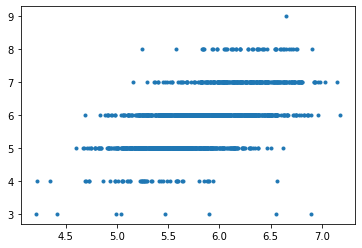

In [ ]:
plt.plot(y_pred, y_test, ls='', marker='.')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

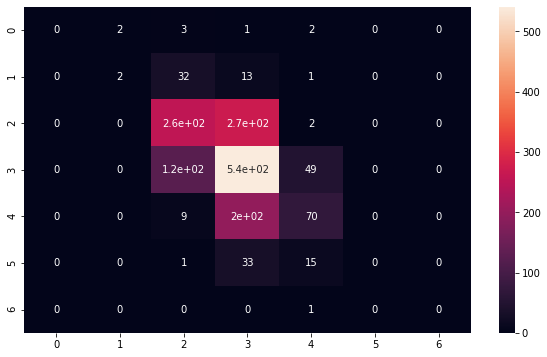

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,np.round(y_pred)),annot=True)

## Option 2

We're going to use `make_column_selector` and `make_column_transformer` to avoid having to select datatypes with pandas. We can then parallelize the categorical and numerical pipes

In [ ]:
# create X and y
X = df.copy()
y = X.pop('quality')

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# the numerical values pipe
num_proc = make_pipeline(SimpleImputer(strategy='median'), # impute with median
                         StandardScaler()) # scale and center

# the categorical values pipe
cat_proc = make_pipeline(
    SimpleImputer(strategy='constant', 
                  fill_value='missing'), # impute with placeholder
    OneHotEncoder(handle_unknown='ignore')) # one hot encode

# parallelize the two pipes
preprocessor = make_column_transformer((num_proc,
                                make_column_selector(dtype_include=np.number)),
                                       (cat_proc,
                                make_column_selector(dtype_include=object)))

In [ ]:
def MyPipeline(**kwargs):
    return make_pipeline(preprocessor,
                         LinearRegression(**kwargs))

In [ ]:
model = MyPipeline()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.32353768028924146

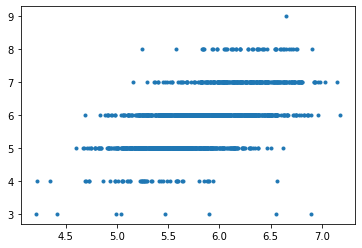

In [ ]:
plt.plot(y_pred, y_test, ls='', marker='.')

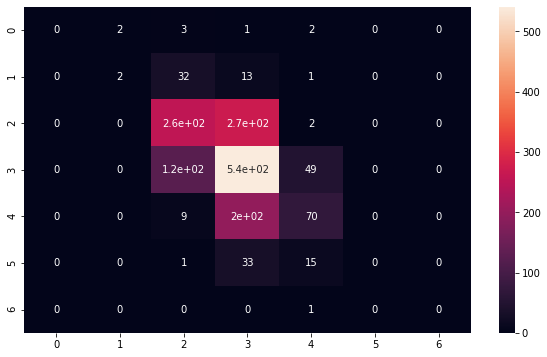

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,np.round(y_pred)),annot=True)

We get more or less the same thing...